In [23]:
import numpy as np
import cv2
import requests
import shutil
import os

# visual
import matplotlib.pyplot as plt

# Basic I/O

## Reading/Writing an image

In [2]:
# 3x3 black image
img = np.zeros((3,3),dtype=np.uint8)
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [3]:
# convert the gray scale image into BGR format
img = cv2.cvtColor(img,code=cv2.COLOR_GRAY2BGR)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
img.shape

(3, 3, 3)

In [5]:
response = requests.get("https://images.unsplash.com/photo-1459478309853-2c33a60058e7",
                        stream=True)
if response.status_code == 200:
    with open("../images/color.jpg","wb") as f:
        response.raw.decode_content = True
        shutil.copyfileobj(response.raw,f)
        

In [40]:
def view_image(img_array,cmap="viridis",convert_rgb=False):
    if convert_rgb:
        plt.imshow(cv2.cvtColor(img_array,code=cv2.COLOR_BGR2RGB),cmap=cmap)
    else:
        plt.imshow(img_array,cmap=cmap)
    plt.axis("off");

In [19]:
color_image = cv2.imread("../images/color.jpg")
#? default image format is BGR
cv2.imwrite("../images/color_copy.jpg",color_image)

True

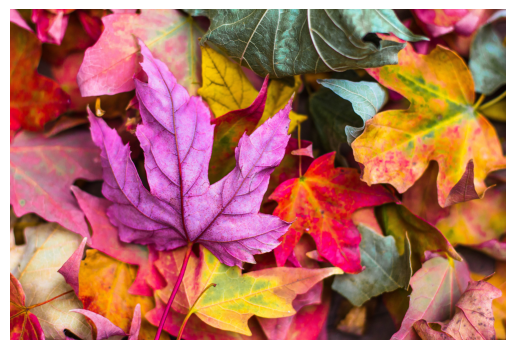

In [41]:
view_image(color_image,convert_rgb=True)

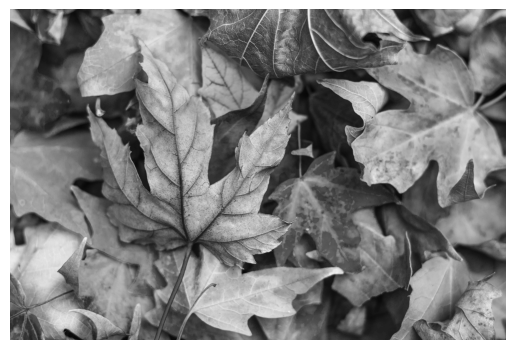

In [16]:
# load as gray image
gray_image = cv2.imread("../images/color.jpg",cv2.IMREAD_GRAYSCALE)
view_image(gray_image,cmap="gray")

In [10]:
cv2.imwrite("../images/gray.jpg",gray_image)

True

### Converting between an image and raw byte

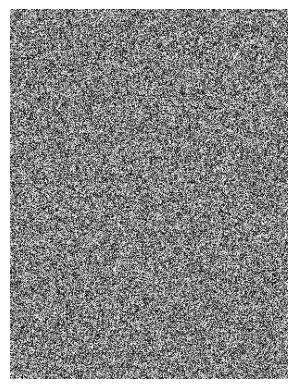

In [34]:
#make random array 
random_byte_array = bytearray(os.urandom(120000))
numpy_array = np.array(random_byte_array)

# convert the array to make 400x300 gray image
gray_image = numpy_array.reshape(400,300)
view_image(gray_image,cmap="gray")

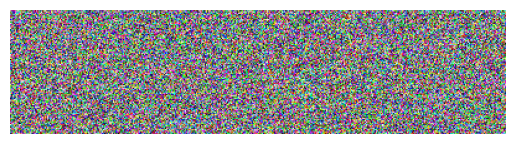

In [35]:
# convert the array to make 100x400x3 image
rbg_image = numpy_array.reshape(100,400,3)
view_image(rbg_image)

### Accessing image data with np.array

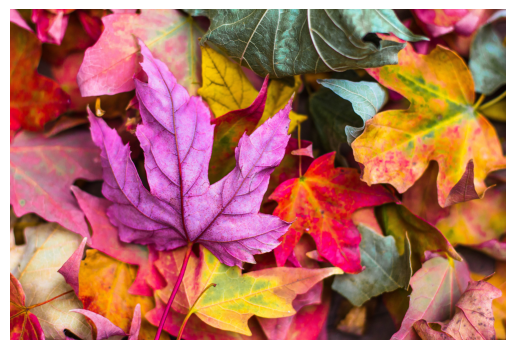

In [42]:
img = cv2.imread("../images/color.jpg")
view_image(img,convert_rgb=True)

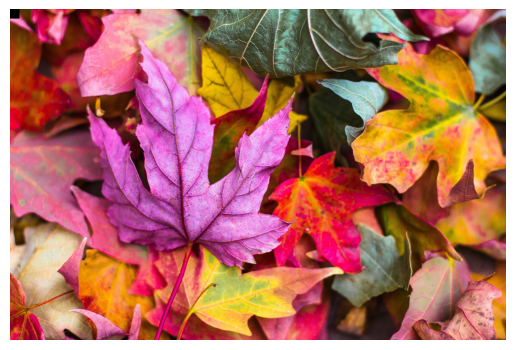

In [49]:
# placing the black dot to top left corner
img[0:100,0:100] = [0,0,0]
view_image(img,convert_rgb=True)

## Reading/Writing a video file

In [70]:
response = requests.get("https://file-examples.com/storage/fe1aa0c9d563ea1e4a1fd34/2018/04/file_example_AVI_480_750kB.avi",
                        stream=True)
if response.status_code == 200:
    with open("../videos/sample.avi","wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            f.write(chunk)

In [80]:
video_capture = cv2.VideoCapture("../videos/sample.avi")
fps = video_capture.get(cv2.CAP_PROP_FPS)
size = (int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fps,size

(30.0, (480, 270))

In [81]:
video_writer = cv2.VideoWriter(
    "../videos/sample_out.avi", # save filename
    cv2.VideoWriter_fourcc("I","4","2","0"), # video codec
    fps,
    size
)

In [82]:
# read the video frame by frame
success,frame = video_capture.read()
while success: # loop until the last frame
    video_writer.write(frame)
    success,frame = video_capture.read()

## Capture camera frames

In [96]:
camera_capture = cv2.VideoCapture(0)
fps = 30
size = (int(camera_capture.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

In [99]:
video_writer = cv2.VideoWriter(
    "../videos/cam_out.mp4",
    cv2.VideoWriter_fourcc("M","P","4","V"),
    fps,
    size
)

success,frame = camera_capture.read()
num_frame_rem = 10 * fps - 1 
while success and num_frame_rem >0 and video_capture.isOpened():
    video_writer.write(frame)
    success,frame = camera_capture.read()
    num_frame_rem -= 1

video_writer.release()
camera_capture.release()

# Display the image in a window

In [116]:
img = cv2.imread("../images/color.jpg")
cv2.namedWindow("window name",cv2.WINDOW_NORMAL)
cv2.imshow("window name",img)
cv2.waitKey()
cv2.destroyAllWindows()

# Displaying the camera frame in a window

In [123]:
clicked =False
# listen the mouse input
def on_mouse(event,x,y,flags,param):
    global clicked
    if event == cv2.EVENT_LBUTTONUP:
        clicked = True
        

camera_capture = cv2.VideoCapture(0)
cv2.namedWindow("Camera feed",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Camera feed",on_mouse)

success,frame = camera_capture.read()
while success and cv2.waitKey(1) == -1: # and not clicked:
    cv2.imshow("Camera feed",frame)
    success,frame = camera_capture.read()

cv2.destroyWindow("Camera feed")
camera_capture.release()